In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("data/sample_data_embeddings.csv")

In [13]:
data.head()

problem_id source                                           solution  \
0  HumanEval/0  Human      for idx, elem in enumerate(numbers):\n    ...   
1  HumanEval/1  Human      result = []\n    current_string = []\n    ...   
2  HumanEval/2  Human                              return number % 1.0\n   
3  HumanEval/3  Human      balance = 0\n\n    for op in operations:\n...   
4  HumanEval/4  Human      mean = sum(numbers) / len(numbers)\n    re...   

          0         1         2         3         4         5         6  ...  \
0 -0.004247 -0.005158  0.005247 -0.019879  0.004960  0.025503  0.002922  ...   
1  0.017016  0.027445  0.000411 -0.023322 -0.014780  0.007986 -0.005941  ...   
2  0.020809  0.016133  0.011168 -0.041892  0.004910 -0.006780 -0.008554  ...   
3  0.009949 -0.005340 -0.006248 -0.022691 -0.007548  0.010208 -0.014631  ...   
4  0.008044  0.004901  0.036726 -0.031968  0.003839 -0.007312  0.022597  ...   

       1526      1527      1528      1529      1530      1531      1532  \
0  0.008758 -0.008250  0.024288 -0.016883 -0.035614 -0.008507  0.025885   
1  0.012250 -0.021675  0.050740 -0.048946 -0.039254 -0.013910 -0.009546   
2  0.027286 -0.017439  0.010102 -0.024659 -0.033695  0.003765  0.011181   
3  0.013687 -0.037455  0.034795  0.009058 -0.031603  0.009231  0.019353   
4  0.031106 -0.021173  0.009012 -0.027080 -0.029093 -0.000782  0.032491   

       1533      1534      1535  
0 -0.008422  0.007293 -0.032129  
1 -0.005010  0.008247 -0.044421  
2 -0.013574 -0.007592 -0.046596  
3 -0.007209  0.038626 -0.046048  
4 -0.029250  0.002658 -0.044175  

[5 rows x 1539 columns]

## Modelling

In [14]:
features = list(data.columns[4:])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data[features].values, data["source"], test_size=0.3, random_state=3)

In [16]:
forest_model = RandomForestClassifier(random_state=0, n_estimators=160, max_features="sqrt")
forest_model.fit(X_train, y_train)
print("Accuracy on test set:", np.round(accuracy_score(y_test, forest_model.predict(X_test)), 3)*100, "%")

Accuracy on test set: 99.0 %


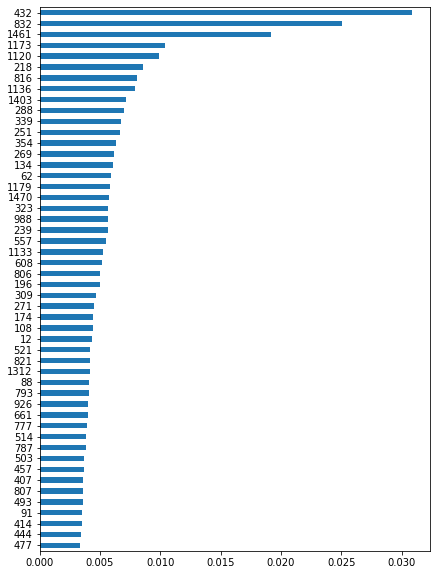

In [17]:
plt.figure(figsize=(7, 10))
ax = pd.Series(forest_model.feature_importances_, index=features).sort_values(ascending=True).tail(50).plot.barh()

In [18]:
misclassified = y_test != forest_model.predict(X_test)

In [19]:
data.loc[misclassified.index[misclassified]]["solution"][122].splitlines()

['    return sum(elem for elem in arr[:k] if len(str(elem)) <= 2)']